In [1]:
import torch
from slot_attention.disentangle import SlotAttentionModel
from slot_attention.data import CLEVRDataModule
from torchvision import transforms
from slot_attention.utils import rescale

In [2]:
clevr_transforms = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(rescale),
    transforms.Resize((128,128)),
    ])

clevr_datamodule = CLEVRDataModule(data_root='data/CLEVR_v1.0/',
                                   max_n_objects=7,
                                   train_batch_size=64,
                                   val_batch_size=1,
                                   clevr_transforms=clevr_transforms,
                                   num_workers=4)

In [3]:
model = SlotAttentionModel().cpu()

In [4]:
state_dict = torch.load('wandb/run-20210303_210043-1y7t705g/files/slot-attention-clevr6/1y7t705g/checkpoints/epoch=452-step=35786.ckpt', map_location=lambda storage, loc: storage)['state_dict']
from collections import OrderedDict
state_dict_new = OrderedDict()
for k, v in state_dict.items():
    name = k[6:]  # 去掉 `model.`
    state_dict_new[name] = v

model.load_state_dict(state_dict_new)

<All keys matched successfully>

In [5]:
dl = clevr_datamodule.val_dataloader()

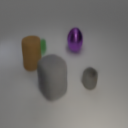

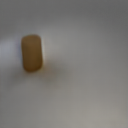

In [9]:
batch = next(iter(dl))
recon_combined, recons, masks, slots = model.forward(batch.cpu())
import numpy as np
from PIL import Image
display(Image.fromarray(((recon_combined[0]*0.5+0.5).clamp(0, 1).detach().numpy()*255).astype(np.uint8).transpose(1,2,0)))
display(Image.fromarray(((recons[0][0]*0.5+0.5).clamp(0, 1).detach().numpy()*255).astype(np.uint8).transpose(1,2,0)))

0 -1


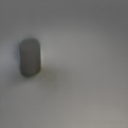

0 0


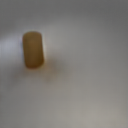

0 1


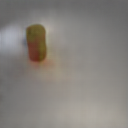

1 -1


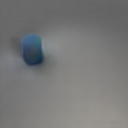

1 0


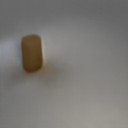

1 1


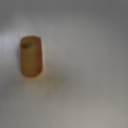

2 -1


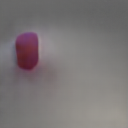

2 0


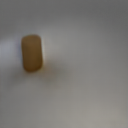

2 1


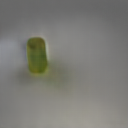

3 -1


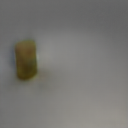

3 0


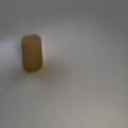

3 1


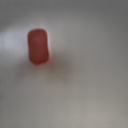

4 -1


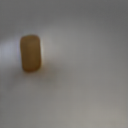

4 0


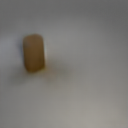

4 1


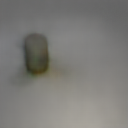

5 -1


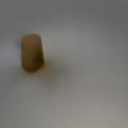

5 0


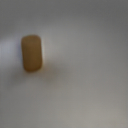

5 1


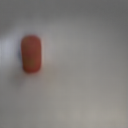

6 -1


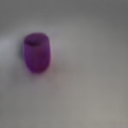

6 0


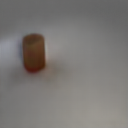

6 1


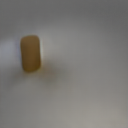

7 -1


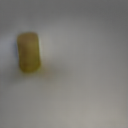

7 0


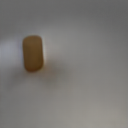

7 1


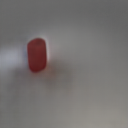

8 -1


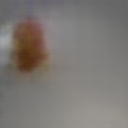

8 0


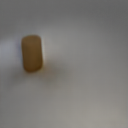

8 1


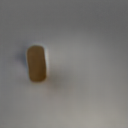

9 -1


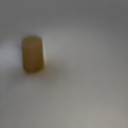

9 0


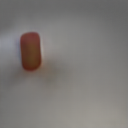

9 1


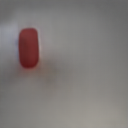

10 -1


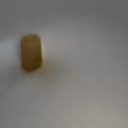

10 0


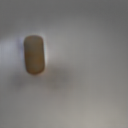

10 1


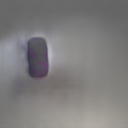

11 -1


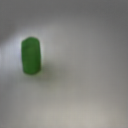

11 0


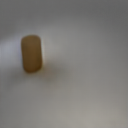

11 1


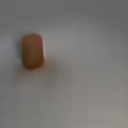

12 -1


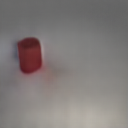

12 0


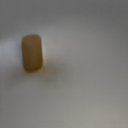

12 1


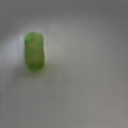

13 -1


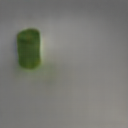

13 0


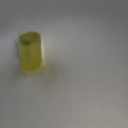

13 1


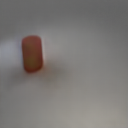

14 -1


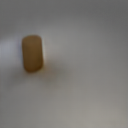

14 0


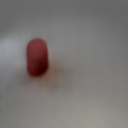

14 1


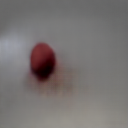

15 -1


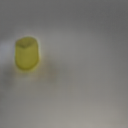

15 0


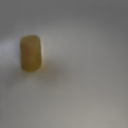

15 1


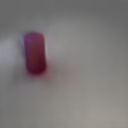

16 -1


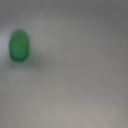

16 0


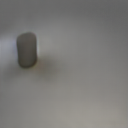

16 1


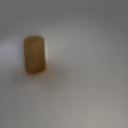

17 -1


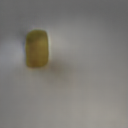

17 0


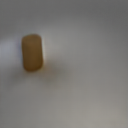

17 1


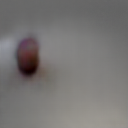

18 -1


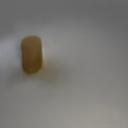

18 0


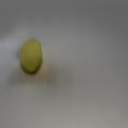

18 1


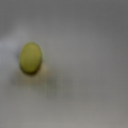

19 -1


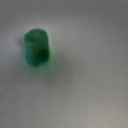

19 0


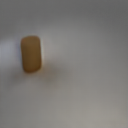

19 1


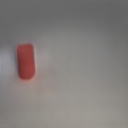

20 -1


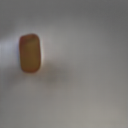

20 0


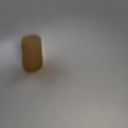

20 1


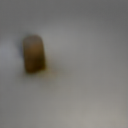

21 -1


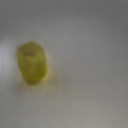

21 0


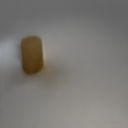

21 1


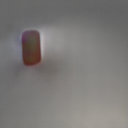

22 -1


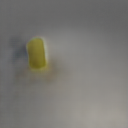

22 0


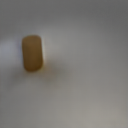

22 1


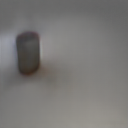

23 -1


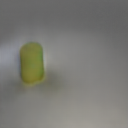

23 0


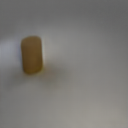

23 1


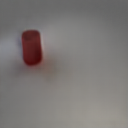

24 -1


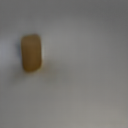

24 0


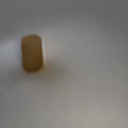

24 1


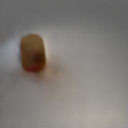

25 -1


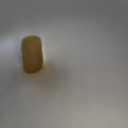

25 0


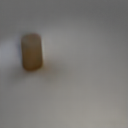

25 1


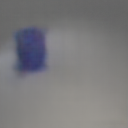

26 -1


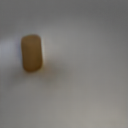

26 0


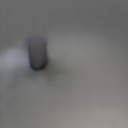

26 1


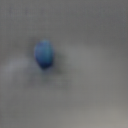

27 -1


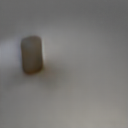

27 0


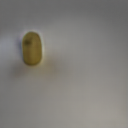

27 1


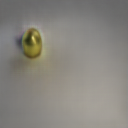

28 -1


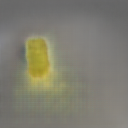

28 0


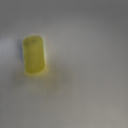

28 1


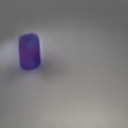

29 -1


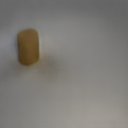

29 0


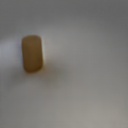

29 1


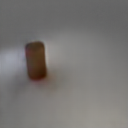

30 -1


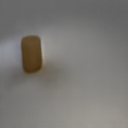

30 0


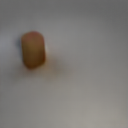

30 1


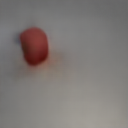

31 -1


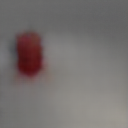

31 0


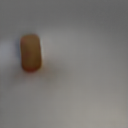

31 1


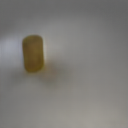

32 -1


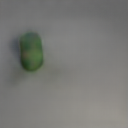

32 0


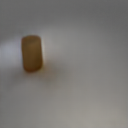

32 1


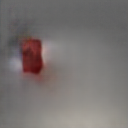

33 -1


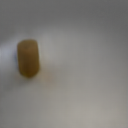

33 0


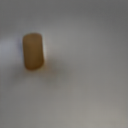

33 1


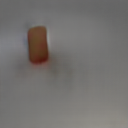

34 -1


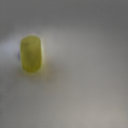

34 0


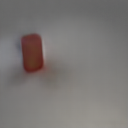

34 1


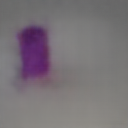

35 -1


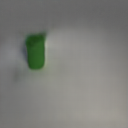

35 0


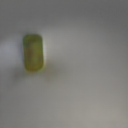

35 1


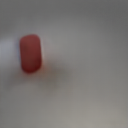

36 -1


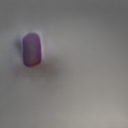

36 0


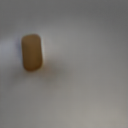

36 1


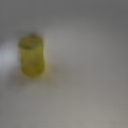

37 -1


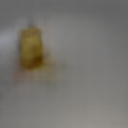

37 0


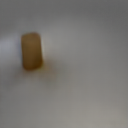

37 1


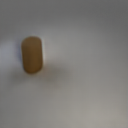

38 -1


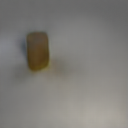

38 0


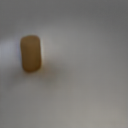

38 1


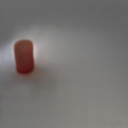

39 -1


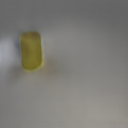

39 0


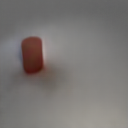

39 1


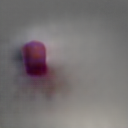

40 -1


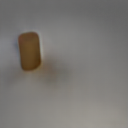

40 0


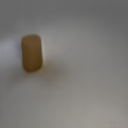

40 1


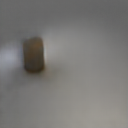

41 -1


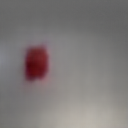

41 0


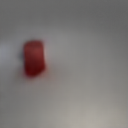

41 1


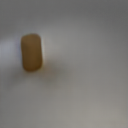

42 -1


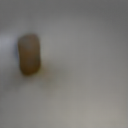

42 0


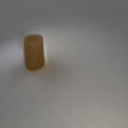

42 1


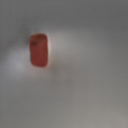

43 -1


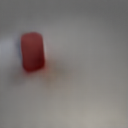

43 0


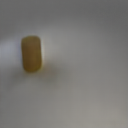

43 1


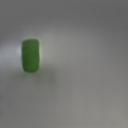

44 -1


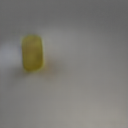

44 0


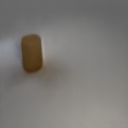

44 1


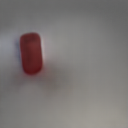

45 -1


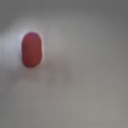

45 0


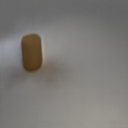

45 1


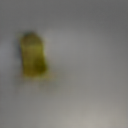

46 -1


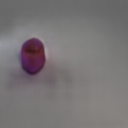

46 0


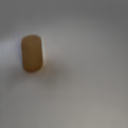

46 1


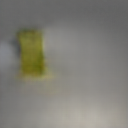

47 -1


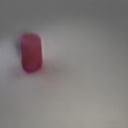

47 0


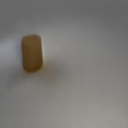

47 1


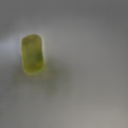

48 -1


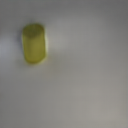

48 0


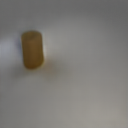

48 1


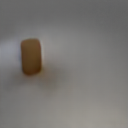

49 -1


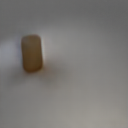

49 0


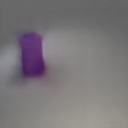

49 1


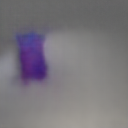

50 -1


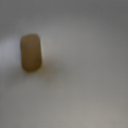

50 0


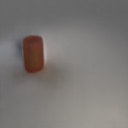

50 1


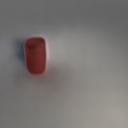

51 -1


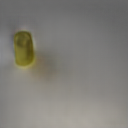

51 0


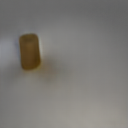

51 1


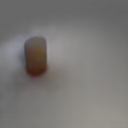

52 -1


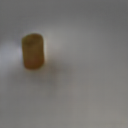

52 0


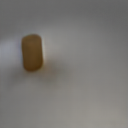

52 1


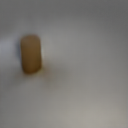

53 -1


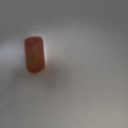

53 0


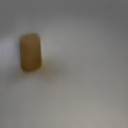

53 1


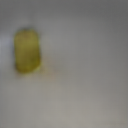

54 -1


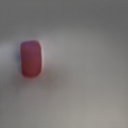

54 0


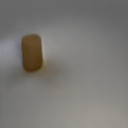

54 1


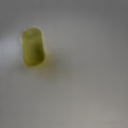

55 -1


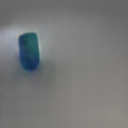

55 0


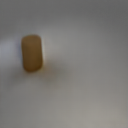

55 1


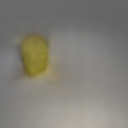

56 -1


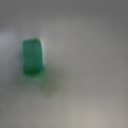

56 0


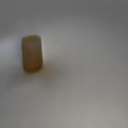

56 1


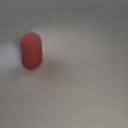

57 -1


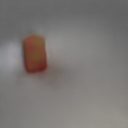

57 0


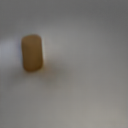

57 1


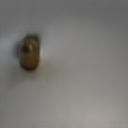

58 -1


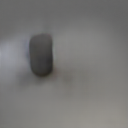

58 0


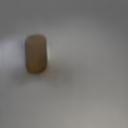

58 1


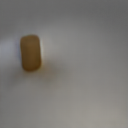

59 -1


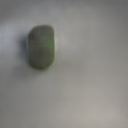

59 0


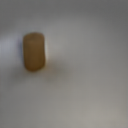

59 1


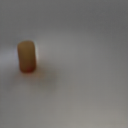

60 -1


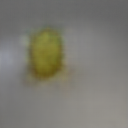

60 0


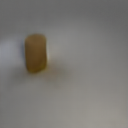

60 1


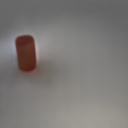

61 -1


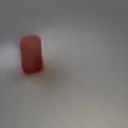

61 0


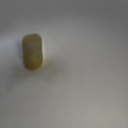

61 1


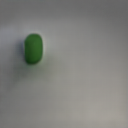

62 -1


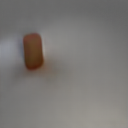

62 0


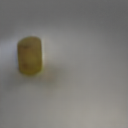

62 1


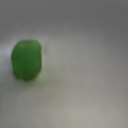

63 -1


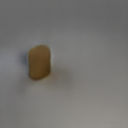

63 0


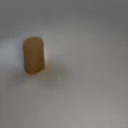

63 1


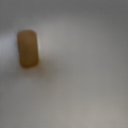

In [13]:

for i in range(64):
    for j in [-1,0,1]:
        slots_f = slots.clone()
        slots_f[0][i]=j
        recon_combined, recons, masks, _ = model.forward(batch,force_slots=slots_f)
        print(i,j)
        #isplay(Image.fromarray(((recon_combined[0]*0.5+0.5).clamp(0, 1).detach().numpy()*255).astype(np.uint8).transpose(1,2,0)))
        display(Image.fromarray(((recons[0][0]*0.5+0.5).clamp(0, 1).detach().numpy()*255).astype(np.uint8).transpose(1,2,0)))

In [ ]:
slots[0]